# Build High Performance Time Series Models using Auto ARIMA in Python and R

time series – It is a series of data points measured at consistent time intervals. This simply means that particular values are recorded at a constant interval which may be hourly, daily, weekly, every 10 days, and so on. What makes time series different is that each data point in the series is dependent on the previous data points.

# Methods for time series forecasting

Naive Approach: In this forecasting technique, the value of the new data point is predicted to be equal to the previous data point. The result would be a ﬂat line, since all new values take the previous values.

Simple Average: The next value is taken as the average of all the previous values. The predictions here are better than the ‘Naive Approach’ as it doesn’t result in a ﬂat line but here, all the past values are taken into consideration which might not always be useful.

Moving Average : This is an improvement over the previous technique. Instead of taking the average of all the previous points, the average of ‘n’ previous points is taken to be the
predicted value.

Weighted moving average : A weighted moving average is a moving average where the past ‘n’ values are given different weights.

Simple Exponential Smoothing: In this technique, larger weights are assigned to more recent observations than to observations from the distant past.

Holt’s Linear Trend Model: This method takes into account the trend of the dataset. By trend, we mean the increasing or decreasing nature of the series.

Holt Winters Method: This algorithm takes into account both the trend and the seasonality of the series.

ARIMA: ARIMA is a very popular technique for time series modeling. It describes the correlation between data points and takes into account the difference of the values. An improvement over ARIMA is SARIMA (or seasonal ARIMA). 

ARIMA stands for Auto-Regressive Integrated Moving Averages.

ARIMA models work on the following assumptions:
    - The data series is stationary, which means that the mean and variance should not vary with time. A series can be made stationary by using log transformation or differencing the series.
    - The data provided as input must be a univariate series, since arima uses the past values to predict the future values.
    
ARIMA has three components – AR (autoregressive term), I (differencing term) and MA (moving average term).
    - AR term refers to the past values used for forecasting the next value. The AR term is deﬁned by the parameter ‘p’ in arima. The value of ‘p’ is determined using the PACF plot.
    - MA term is used to deﬁnes number of past forecast errors used to predict the future values. The parameter ‘q’ in arima represents the MA term. ACF plot is used to identify the correct ‘q’ value.
    - Order of differencing  speciﬁes the number of times the differencing operation is performed on series to make it stationary. Test like ADF and KPSS can be used to determine
whether the series is stationary and help in identifying the d value.

# Library

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [18]:
#load the data
data = pd.read_csv('international-airline-passengers.csv')

C:\Users\imanursar\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<IPython.core.display.Javascript object>


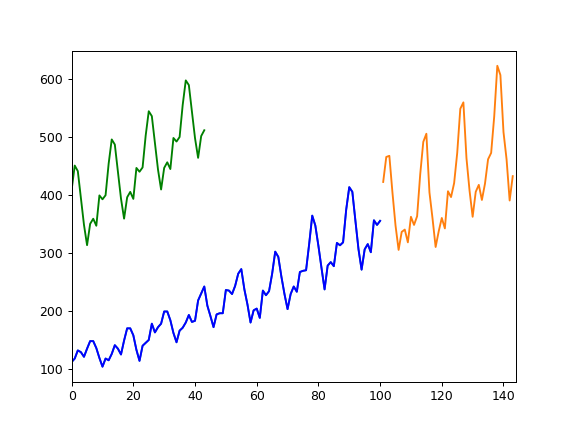

In [19]:
#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]
#preprocessing (since arima takes univariate series as input)
train.drop('Month',axis=1,inplace=True)
valid.drop('Month',axis=1,inplace=True)
#plotting the data
train['International airline passengers'].plot()
valid['International airline passengers'].plot()
plt.show()

In [21]:
#building the model
import pmdarima as pm
model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)
# make your forecasts
forecasts = model.predict(valid.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
# x = np.arange(y.shape[0])
plt.plot(train, c='blue', label='Train')
plt.plot(forecasts, c='green', label='Prediction')
plt.show()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=895.566, BIC=911.197, Time=0.234 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=917.952, BIC=923.162, Time=0.008 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=915.557, BIC=923.372, Time=0.034 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=913.419, BIC=921.234, Time=0.046 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=917.028, BIC=919.633, Time=0.006 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=894.597, BIC=907.623, Time=0.183 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=892.501, BIC=905.527, Time=0.210 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(

E:\programs\python\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\programs\python\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\programs\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\programs\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(valid,forecast))
print(rms)